In [1]:

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from scipy import stats

In [3]:
vdata = pd.read_csv("data.csv")

In [4]:
vdata = vdata[vdata['horsepower'] != "?" ]

In [5]:
vdata = vdata.reset_index(drop = True)

In [6]:
vdata["horsepower"] = vdata["horsepower"].astype(int)

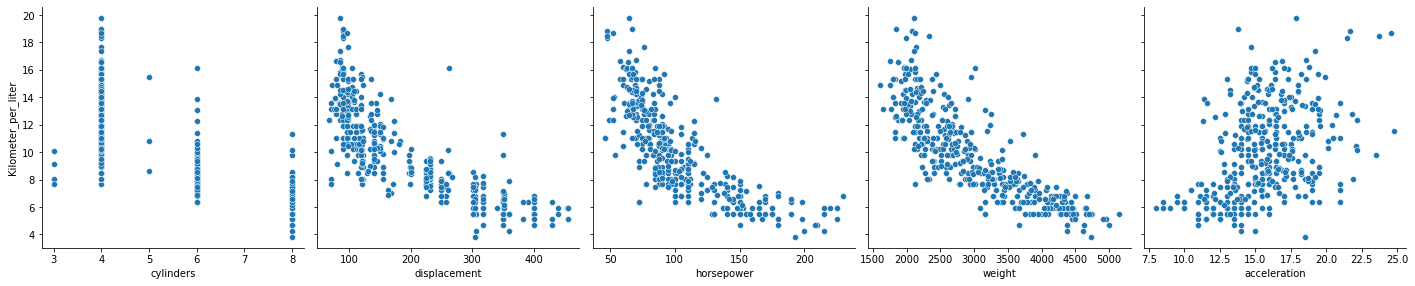

In [7]:
sns.pairplot(vdata, x_vars=['cylinders', 'displacement', 'horsepower','weight','acceleration'], y_vars='Kilometer_per_liter',size=4, aspect=1, kind='scatter')
plt.show()

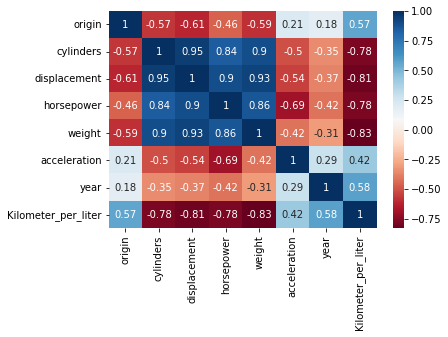

In [8]:
sns.heatmap(vdata.corr(),cmap="RdBu",annot = True)
plt.show()

In [9]:
x = vdata["weight"]
y = vdata["Kilometer_per_liter"]

In [10]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

In [11]:

def avg(x):
  return slope * x + intercept

mileage = avg(3000)

print(mileage)

9.895005918507456


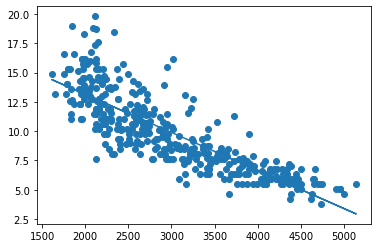

In [12]:
def avg(x):
  return slope * x + intercept

mymodel = list(map(avg, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 15000)


In [14]:
lr = LinearRegression()

In [18]:
x_trainrs = x_train.values.reshape(-1,1)
y_trainrs = y_train.values.reshape(-1,1)
x_testrs = x_test.values.reshape(-1,1)
y_testrs = y_test.values.reshape(-1,1)

In [22]:
lr.fit(x_trainrs,y_trainrs)

LinearRegression()

In [25]:
y_pred = lr.predict(x_testrs)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
np.sqrt(mean_squared_error(y_testrs, y_pred))

1.9715380357442558

In [28]:
r_squared = r2_score(y_testrs, y_pred)
r_squared

0.7050458225131255

In [32]:
lr.predict([3000])

ValueError: ignored

In [35]:
predicted = lr.predict(pd.DataFrame([3000]))
print(predicted)

[[9.84892174]]
